In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import torch
import torchvision
import numpy as np
import torchvision.transforms as transforms
from dataset.get_dataloader import get_dataloader,loader2vec, vec_dis
from dataset.data2betti import distance_betti, distance_betti_ripser, plt_betti_number,plot_betti_number_bars

from ripser import Rips, ripser
from dataset.get_betti_number import betti_4_data

# 释放不需要的内存
torch.cuda.empty_cache()


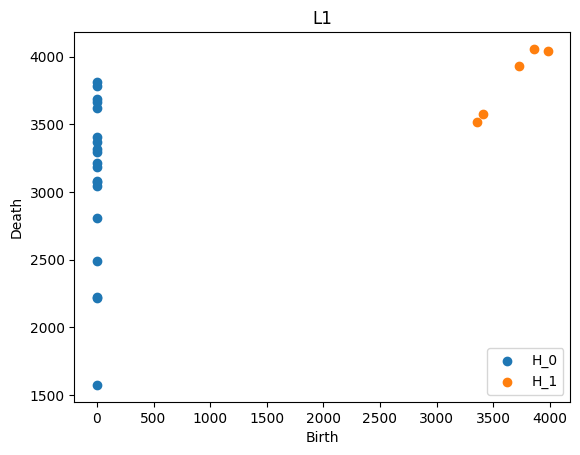

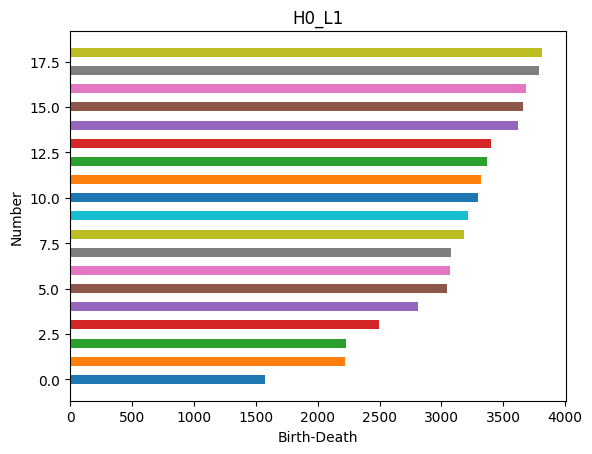

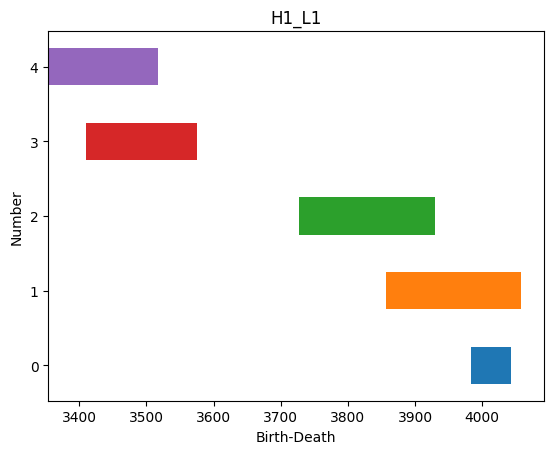

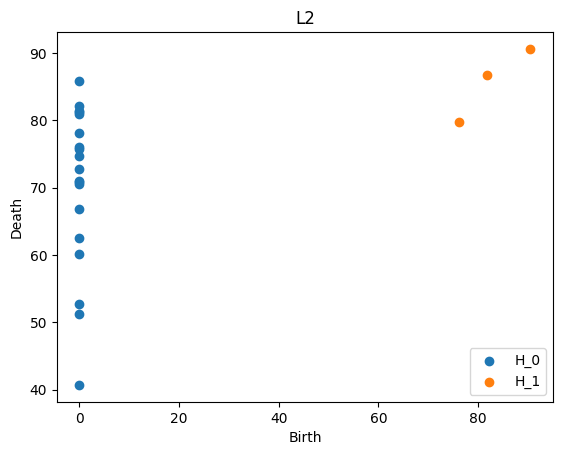

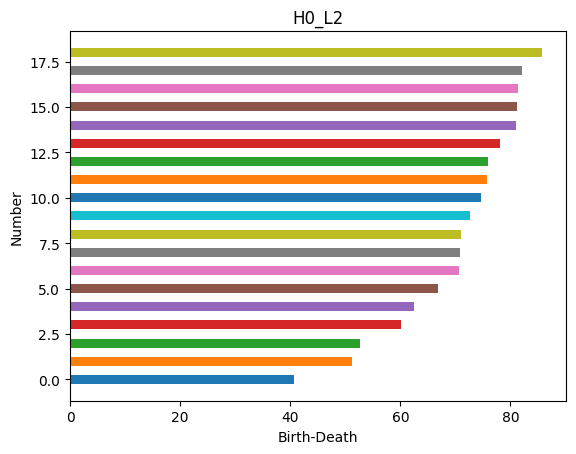

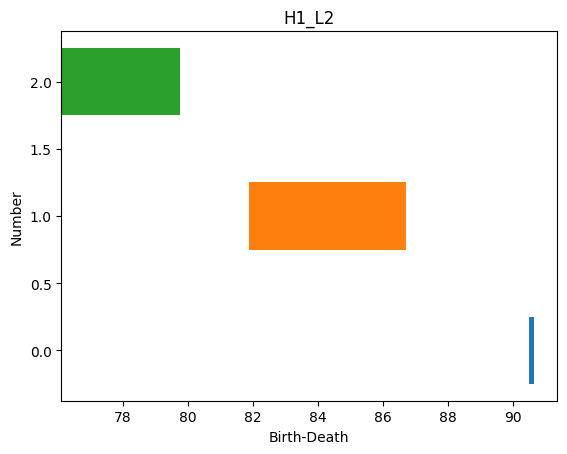

{'data-birth-death-l1_distance': [array([[   0.        , 1574.57214355],
         [   0.        , 2219.62646484],
         [   0.        , 2227.06982422],
         [   0.        , 2492.95263672],
         [   0.        , 2809.94580078],
         [   0.        , 3042.4296875 ],
         [   0.        , 3071.2355957 ],
         [   0.        , 3079.68457031],
         [   0.        , 3185.09716797],
         [   0.        , 3217.51489258],
         [   0.        , 3297.08642578],
         [   0.        , 3319.19824219],
         [   0.        , 3368.38232422],
         [   0.        , 3404.41259766],
         [   0.        , 3621.57788086],
         [   0.        , 3661.32739258],
         [   0.        , 3685.00195312],
         [   0.        , 3786.16796875],
         [   0.        , 3815.80566406],
         [   0.        ,           inf]]),
  array([[3983.26708984, 4042.75219727],
         [3856.53735352, 4056.94677734],
         [3726.65527344, 3929.02636719],
         [3410.33569336

In [11]:
image_size = 32
CIFAR_MEAN = [0.49139968, 0.48215827, 0.44653124]
CIFAR_STD = [0.2023, 0.1994, 0.2010]
data_transform={'train':transforms.Compose([
                    transforms.RandomHorizontalFlip(),
                    transforms.Resize(image_size),
                    transforms.CenterCrop(image_size),
                    transforms.ToTensor(),
                    transforms.Normalize(CIFAR_MEAN, CIFAR_STD)
                    ])}

betti_4_data(seed=15, save_root="./distance/10-tran/", debug_size=10,name="data", transform=data_transform["train"])